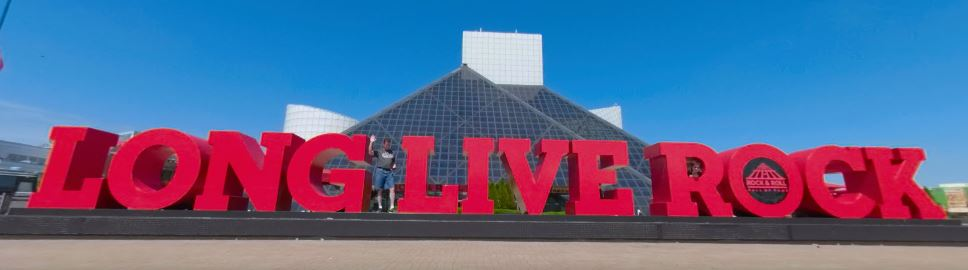



# A comparison of song characteristics
### Analyses utilizing radar plots to compare trend movements in song characteristics for a selection of today's top genres



### **Dependencies**

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, grid, tight_layout
from sklearn import preprocessing
from math import pi

### Import data set and get a sense of data structure
#### Clean up artist strings by removing [ ] and ' ' for easier filtering

In [2]:
path = '../cleaned_data/cleaned_data.csv'
df_data = pd.read_csv(path)
df_data.dropna(axis=0, how = 'any', inplace = True)
df_data['artists'] = df_data['artists'].astype('string')
df_data['artists'] = df_data['artists'].str.strip('[]')
df_data['artists'] = df_data['artists'].str.strip("'")
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920
1,0.643000,"""Screamin' Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920


# Individual Artist Top 20 Song Attributes -- Selected Artists
1. Eminem
2. Taylor Swift
3. Blake Shelton
4. Skrillex
5. Metallica

### Setup radar plot categories

In [3]:
categories = ['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']
radar_categories = []
for word in categories:
    capital = word[0].upper()
    word = capital + word[1:]
    radar_categories.append(word)

### Eminem top 20 song filter

In [4]:
filt = df_data['artists']=='Eminem'
df_MM = df_data.loc[filt]

df_MM = df_MM.sort_values(by = 'popularity', ascending = False)
df_MM.reset_index(drop = True, inplace = True)
df_MM = df_MM[0:19]

df_MM_radar = df_MM[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

x = df_MM_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_MM_norm = pd.DataFrame(x_scaled, columns = df_MM_radar.columns)

# hard coding because (1) all songs are explicit and (2) the normalization returned 0 due to / 0 error
df_MM_norm['explicit']=1 

### Eminem radar plot

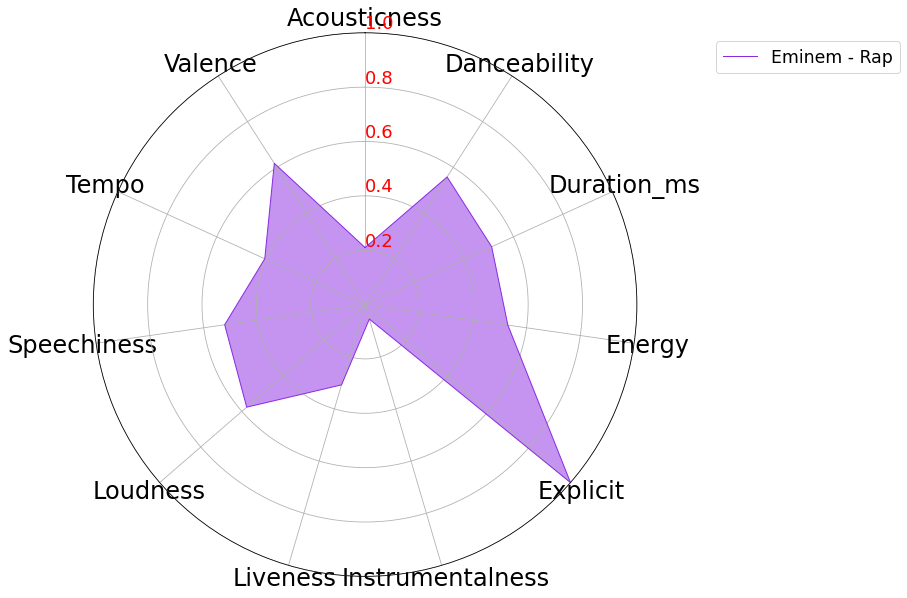

In [5]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'

# Artists
artists = 'Eminem - Rap'

values = df_MM_norm.mean().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = artists, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_artist'+ artists + '.png', bbox_inches='tight')

### Taylor Swift top 20 song filter

In [6]:
filt = df_data['artists']=='Taylor Swift'
df_TS = df_data.loc[filt]
df_TS = df_TS.sort_values(by = 'popularity', ascending = False)
df_TS.reset_index(drop = True, inplace = True)
df_TS = df_TS[0:19]

df_TS_radar = df_TS[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

x = df_TS_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_TS_norm = pd.DataFrame(x_scaled, columns = df_TS_radar.columns)

### Taylor Swift radar plot

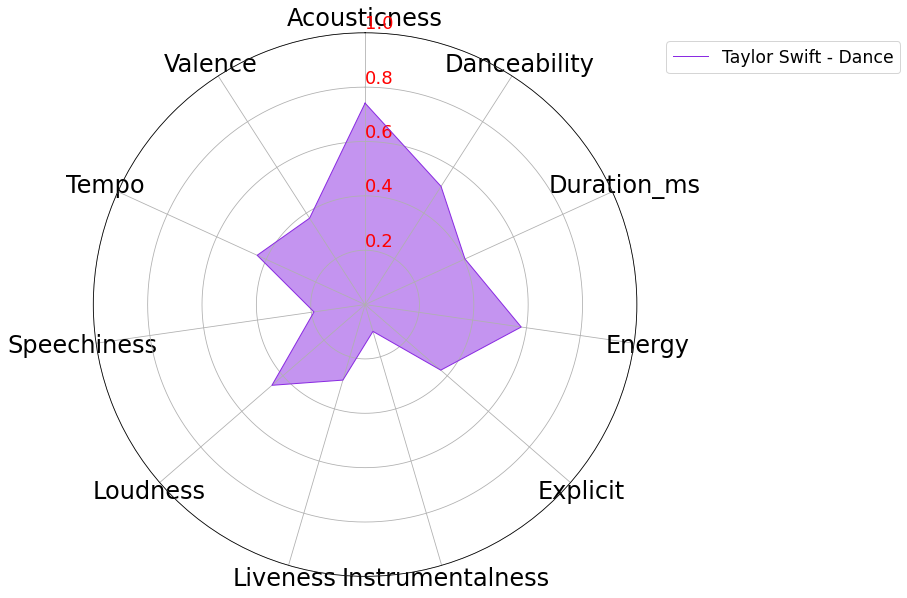

In [7]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'

# Artists
artists = 'Taylor Swift - Dance'

values = df_TS_norm.mean().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = artists, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_artist'+ artists + '.png', bbox_inches='tight')

### Blake Shelton top 20 song filter

In [8]:
filt = df_data['artists']=='Blake Shelton'
df_BS = df_data.loc[filt]
df_BS = df_BS.sort_values(by = 'popularity', ascending = False)
df_BS.reset_index(drop = True, inplace = True)
df_BS = df_BS[0:19]

df_BS_radar = df_BS[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

x = df_BS_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_BS_norm = pd.DataFrame(x_scaled, columns = df_BS_radar.columns)

### Blake Shelton radar plot

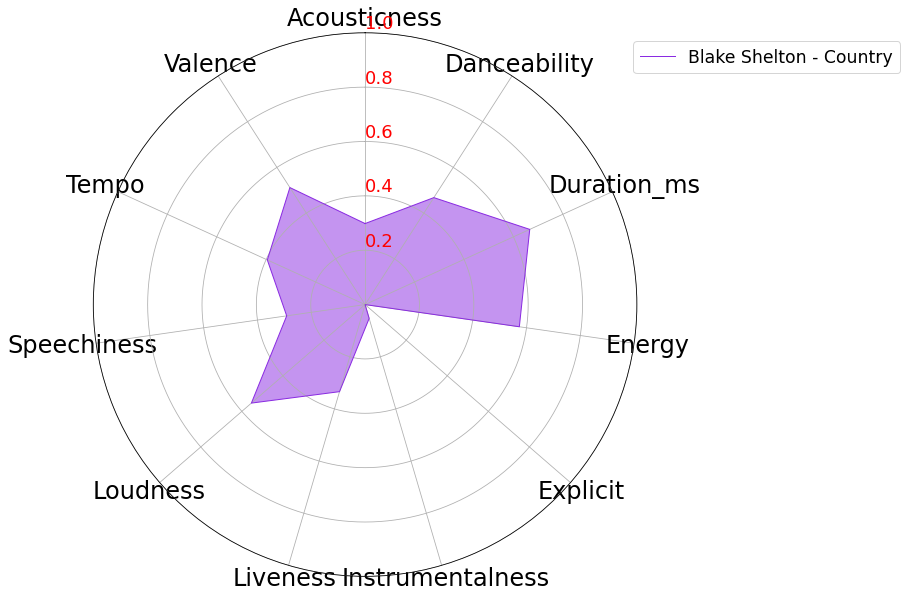

In [17]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'

# Artists
artists = 'Blake Shelton - Country'

values = df_BS_norm.mean().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = artists, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_artist'+ artists + '.png', bbox_inches='tight')

### Skrillex top 20 song filter

In [10]:
filt = df_data['artists']=='Skrillex'
df_M = df_data.loc[filt]
df_M = df_M.sort_values(by = 'popularity', ascending = False)
df_M.reset_index(drop = True, inplace = True)
df_M = df_M[0:19]

df_M_radar = df_M[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

x = df_M_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_M_norm = pd.DataFrame(x_scaled, columns = df_M_radar.columns)

### Skrillex radar plot

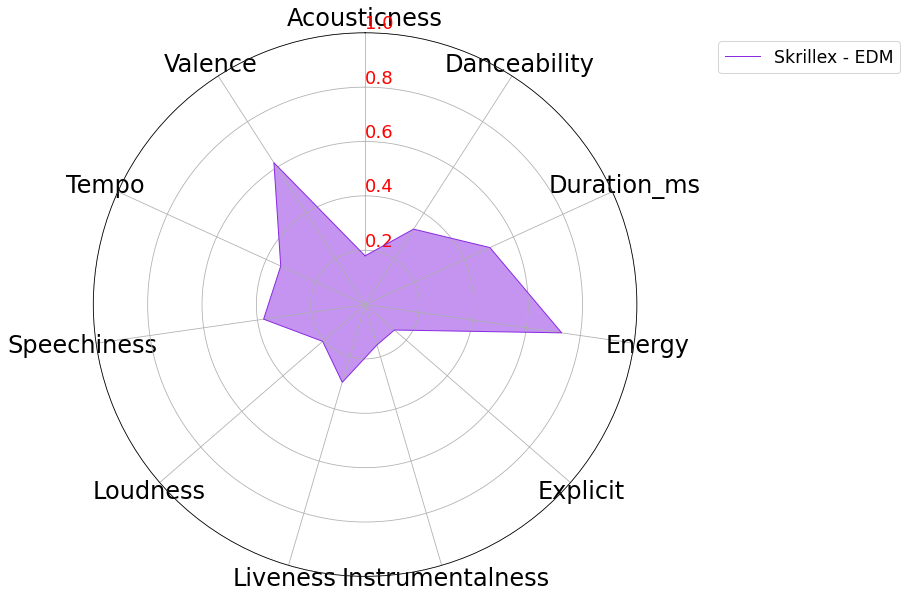

In [11]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'

# Artists
artists = 'Skrillex - EDM'

values = df_M_norm.mean().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = artists, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_artist'+ artists + '.png', bbox_inches='tight')

### Metallica top 20 song filter

In [12]:
filt = df_data['artists']=='Metallica'
df_Meta = df_data.loc[filt]
df_Meta
df_Meta = df_Meta.sort_values(by = 'popularity', ascending = False)
df_Meta.reset_index(drop = True, inplace = True)
df_Meta = df_Meta[0:19]

df_Meta_radar = df_Meta[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

df_Meta_radar

x = df_Meta_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_Meta_norm = pd.DataFrame(x_scaled, columns = df_Meta_radar.columns)

### Metallica radar plot

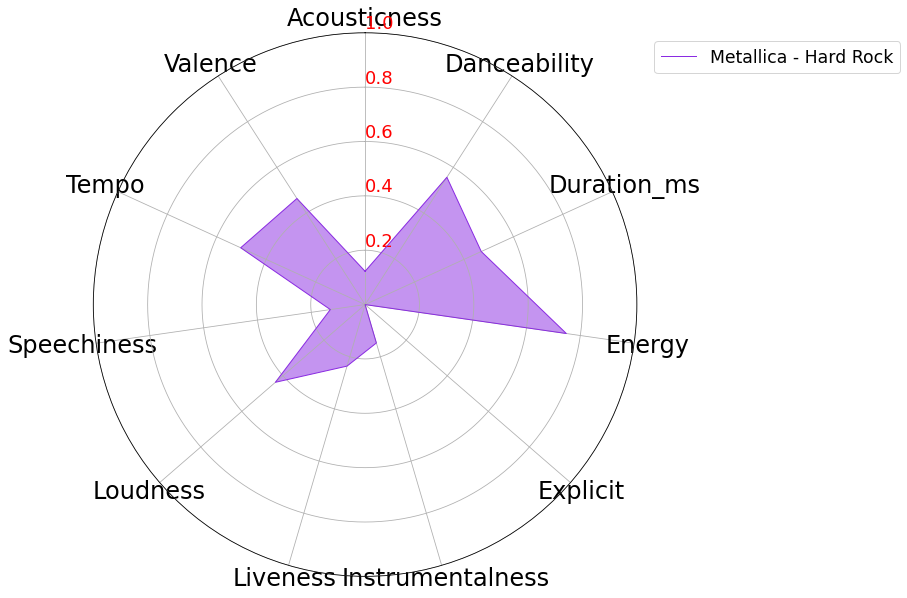

In [13]:
num = len(radar_categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = 'blueviolet'

# Artists
artists = 'Metallica - Hard Rock'

values = df_Meta_norm.mean().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label = artists, color = colors)
ax.fill(angles, values, colors, alpha=0.5)
ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_artist'+ artists + '.png', bbox_inches='tight')

## Top 20 Song Attribute Comparison
### Merge dataframes of artists, use groupby and mean

In [14]:
df_MM_norm['artists'] = df_MM['artists']
df_TS_norm['artists'] = df_TS['artists']
df_BS_norm['artists'] = df_BS['artists']
df_M_norm['artists'] = df_M['artists']
df_Meta_norm['artists'] = df_Meta['artists']

df_mean = pd.concat([df_M_norm, df_MM_norm, df_Meta_norm, df_BS_norm, df_TS_norm])
df_mean = df_mean.groupby('artists')
df_radar = df_mean.mean()

### Generate one radar plot with artist characteristics

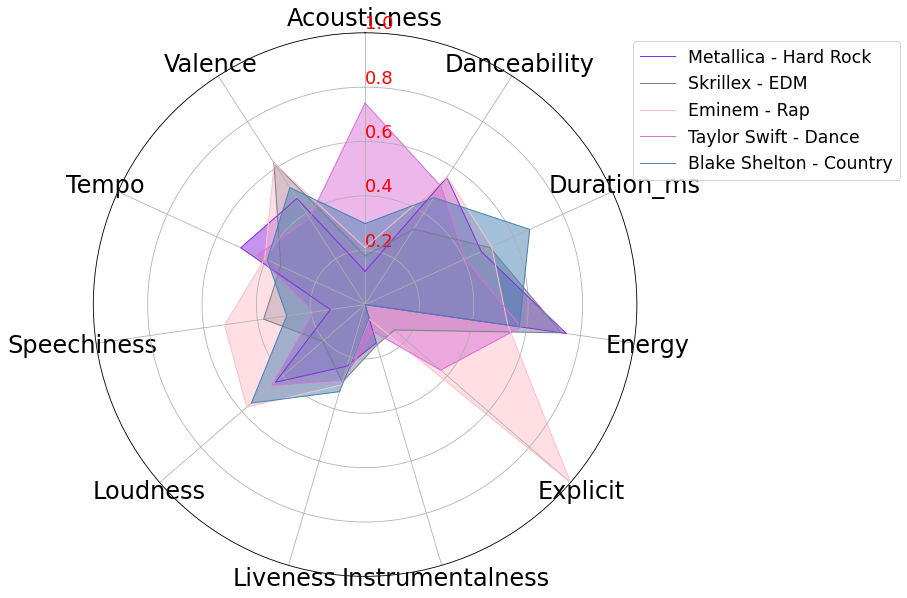

In [16]:
num = len(categories)

angles = [n / float(num) * 2 * pi for n in range(num)]
angles += angles[:1] # the list repeats itself twice without the slice

# Initialise the spider plot
plt.ion
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
plt.xticks(angles[:-1], radar_categories, size = 24)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="red", size=18)
plt.ylim(0,1)

# colors
colors = ['blueviolet', 'slategray', 'pink', 'orchid', 'steelblue']

# Artists
artists = ['Metallica - Hard Rock', 'Skrillex - EDM', 'Eminem - Rap', 'Taylor Swift - Dance', 'Blake Shelton - Country']
cols = ['Metallica', 'Skrillex', 'Eminem', 'Taylor Swift', 'Blake Shelton']

for index in range(len(df_radar.index.values)):
    values = df_radar.loc[cols[index]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label = artists[index], color = colors[index])
    ax.fill(angles, values, colors[index], alpha=0.5)
    ax.legend(loc = 'best', bbox_to_anchor = (1.5, 1.0), fontsize = 'xx-large', markerscale = 2.0)
plt.show()
fig.savefig('../images/radar_all_artists.png', bbox_inches='tight')
